<a href="https://colab.research.google.com/github/dtylor/nodealertness/blob/master/nodealertness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import statistics
from pandas_datareader import data as pdr
import time


# Download historical ticker data from yahoo for S&P 500 companies, including daily close prices for the year of 2015


In [0]:

#SP 500 ingestion code 
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
table = data[0]

tickers = table['Symbol'].tolist()
#comment out line below to exclude SP 500 Index ticker
tickers.append('^GSPC')






In [0]:
s=time.time()

def getTickersClose(start,end):
  d = {}
  for ticker in tickers:   
    try:
      d[ticker] = pdr.DataReader(ticker, "yahoo", start=start, end=end)
    except:
      print("An exception occurred downloading ticker " + ticker)
  e=time.time()
  print('downloaded ticker data in time: ' + str(e-s))
  
  pan = pd.Panel(d)
  df = pan.minor_xs("Close")
  df = df.dropna(axis =1, how='any')
  
  #last prices 
  df_lastprice =df.tail(1)
  df.drop(df.tail(1).index,inplace=True)
  lst_nodes=[]
  for colx in df_lastprice.columns:
     lst_nodes.append([colx, df_lastprice[colx].values[0]])
     
  df_nodes = pd.DataFrame(lst_nodes)
  df_nodes.columns = ['id', 'lastprice']
  return (df,df_nodes)

In [0]:
print(tickers)

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'C

In [0]:
#Download ticker data from start to end
start = '2015-01-01'
end = '2015-12-31'
(df,df_nodes) = getTickersClose(start,end) 

An exception occurred downloading ticker BRK.B
An exception occurred downloading ticker BF.B
An exception occurred downloading ticker CTVA
An exception occurred downloading ticker DOW
An exception occurred downloading ticker FTV
An exception occurred downloading ticker HIG
An exception occurred downloading ticker JEF
An exception occurred downloading ticker LW
An exception occurred downloading ticker LIN
An exception occurred downloading ticker MSI
An exception occurred downloading ticker NKE
An exception occurred downloading ticker OKE
An exception occurred downloading ticker PNW
An exception occurred downloading ticker PPG
An exception occurred downloading ticker VMC
An exception occurred downloading ticker ZBH
downloaded ticker data in time: 324.91359877586365


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
#Show ticker data
df.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,AGN,ADS,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,...,URI,UTX,UHS,UNM,VFC,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VIAB,V,VNO,WAB,WMT,WBA,DIS,WM,WAT,WEC,WCG,WFC,WELL,WDC,WU,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,164.059998,44.900002,65.889999,37.310001,88.839996,20.129999,72.339996,2.67,158.559998,13.70,210.429993,30.540001,40.560001,134.532837,63.250000,60.330002,60.310001,89.790001,186.600006,56.200001,55.049999,259.130005,285.369995,33.250000,70.120003,529.549988,523.373108,48.970001,308.519989,11.20,45.990002,53.910000,61.150002,93.019997,56.110001,99.669998,53.939999,132.089996,90.459999,52.619999,...,103.589996,115.040001,110.970001,34.740002,69.453857,50.340000,76.307899,83.715881,57.189999,63.970001,46.959999,123.070000,75.400002,66.254997,87.332130,87.110001,85.900002,76.000000,93.750000,51.750000,113.879997,53.189999,80.870003,54.700001,76.949997,110.430000,17.930000,36.110001,193.009995,45.220001,118.013245,146.889999,36.119999,36.231884,43.599998,38.080002,52.012939,28.290001,43.310001,2058.199951
2015-01-05,160.360001,44.910000,64.650002,37.070000,87.339996,19.850000,71.980003,2.66,156.470001,13.31,202.800003,29.740000,39.799999,130.231262,61.939999,59.470001,58.310001,90.870003,182.169998,56.990002,54.939999,256.690002,281.399994,32.845001,68.730003,519.460022,512.463013,48.689999,302.190002,11.20,45.529999,53.880001,60.250000,90.559998,55.000000,98.230003,53.110001,127.849998,89.690002,51.040001,...,92.250000,113.120003,108.699997,33.639999,68.870056,48.270000,75.185463,84.138405,56.240002,63.139999,46.570000,121.029999,73.300003,64.792503,87.551620,85.139999,85.650002,74.500000,92.379997,51.230000,113.019997,52.540001,79.070000,53.200001,77.900002,108.970001,17.760000,36.110001,189.029999,43.430000,117.165565,144.389999,35.709999,35.441372,42.799999,35.709999,50.956146,27.230000,43.049999,2020.579956
2015-01-06,158.649994,44.400002,64.330002,36.130001,86.709999,19.480000,70.529999,2.63,156.360001,13.01,198.429993,29.475000,39.180000,130.185013,60.669998,58.770000,57.169998,91.330002,177.949997,57.450001,54.849998,255.169998,277.820007,32.740002,68.680000,506.640015,500.585632,48.980000,295.290009,11.20,45.000000,53.040001,60.580002,88.629997,54.220001,97.970001,53.250000,124.410004,90.180000,50.060001,...,89.389999,111.519997,108.739998,32.919998,68.465157,47.680000,74.413795,86.011192,55.180000,62.919998,47.040001,117.360001,71.849998,64.375000,88.261276,84.040001,86.309998,74.690002,91.889999,51.270000,112.529999,52.680000,77.820000,52.090000,79.010002,106.540001,17.730000,36.070000,187.470001,42.840000,116.582779,141.309998,35.900002,34.967060,42.180000,35.500000,50.330696,26.190001,42.630001,2002.609985
2015-01-07,159.800003,44.759998,66.930000,37.279999,88.529999,19.059999,71.110001,2.58,159.720001,13.03,203.300003,29.660000,39.700001,131.591125,60.160000,59.669998,56.939999,92.570000,187.929993,59.570000,55.599998,265.230011,279.950012,33.279999,69.809998,505.149994,499.727997,49.880001,298.420013,10.72,45.349998,53.009998,61.439999,90.300003,54.480000,99.000000,53.930000,126.620003,91.980003,50.209999,...,88.580002,112.730003,111.989998,33.230000,69.340866,47.310001,76.150055,87.290169,55.639999,62.959999,46.189999,120.660004,71.300003,65.237503,90.126877,84.860001,88.599998,76.599998,92.830002,51.310001,115.930000,53.330002,79.290001,52.400002,79.739998,108.139999,17.559999,36.180000,191.880005,42.610001,118.251656,145.460007,36.209999,35.415020,42.200001,35.779999,51.998562,26.440001,43.509998,2025.900024
2015-01-08,163.630005,45.680000,67.629997,38.959999,89.879997,19.250000,72.919998,2.61,161.119995,13.23,205.369995,29.950001,40.889999,134.634598,61.570000,60.700001,58.730000,93.629997,183.800003,61.439999,56.349998,268.959991,287.929993,33.805000,71.150002,506.910004,501.303680,

In [0]:
#Download ticker data in a following month for calculating anomalies from 2015
(anom_df,anom_df_nodes) = getTickersClose('2016-01-01','2016-01-31') 
anom_df.head()

An exception occurred downloading ticker LNT
An exception occurred downloading ticker BRK.B
An exception occurred downloading ticker BF.B
An exception occurred downloading ticker CTVA
An exception occurred downloading ticker DOW
An exception occurred downloading ticker FTV
An exception occurred downloading ticker HIG
An exception occurred downloading ticker JEF
An exception occurred downloading ticker KMI
An exception occurred downloading ticker LW
An exception occurred downloading ticker LIN
An exception occurred downloading ticker MXIM
An exception occurred downloading ticker MDT
An exception occurred downloading ticker MSI
An exception occurred downloading ticker NKE
An exception occurred downloading ticker PCAR
An exception occurred downloading ticker PM
An exception occurred downloading ticker PNW
An exception occurred downloading ticker PPG
An exception occurred downloading ticker ROL
An exception occurred downloading ticker VMC
downloaded ticker data in time: 714.7462615966797


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,AGN,ADS,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,...,UTX,UHS,UNM,VFC,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VIAB,V,VNO,WAB,WMT,WBA,DIS,WM,WAT,WEC,WCG,WFC,WELL,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04,146.820007,42.930000,57.610001,85.239998,101.830002,37.619999,91.970001,2.77,152.240005,9.43,155.990005,29.590000,40.689999,119.509712,52.310001,78.400002,55.549999,89.110001,184.679993,64.269997,64.529999,307.470001,271.709991,60.669998,759.440002,741.840027,57.389999,636.989990,9.65,43.029999,40.910000,58.330002,67.589996,60.430000,96.699997,60.320000,104.250000,101.870003,52.650002,158.339996,...,95.570000,117.919998,32.750000,57.316383,69.940002,68.968239,56.740002,83.949997,75.300003,45.869999,122.889999,40.820000,75.699997,79.563461,70.160004,61.459999,83.050003,102.980003,52.450001,130.350006,51.320000,76.449997,52.910000,68.389999,60.400002,17.620001,41.012703,29.83,148.089996,26.240000,124.980133,68.769997,35.700001,27.140974,45.799999,36.080002,51.912292,26.709999,47.270000,2012.660034
2016-01-05,147.460007,42.919998,57.369999,85.000000,102.360001,37.139999,92.339996,2.75,151.199997,9.56,154.729996,29.549999,40.549999,117.372803,52.020000,77.089996,54.700001,90.339996,184.899994,64.949997,64.459999,308.730011,274.049988,60.529999,761.530029,742.580017,58.549999,633.789978,9.44,43.540001,40.520000,58.810001,66.550003,60.639999,98.610001,60.150002,103.839996,103.360001,52.380001,158.169998,...,95.720001,118.430000,32.580002,57.645950,71.160004,69.134850,57.740002,81.410004,75.029999,46.500000,123.449997,40.560001,76.269997,80.614388,68.930000,62.919998,80.870003,100.900002,52.650002,129.809998,51.869999,78.120003,52.889999,70.089996,60.139999,17.549999,40.985676,29.90,144.899994,26.330000,125.839996,70.070000,36.060001,27.088274,46.480000,36.070000,51.782890,26.420000,48.009998,2016.709961
2016-01-06,144.490005,42.560001,57.380001,85.300003,102.160004,36.790001,91.019997,2.51,147.199997,9.23,147.929993,29.100000,40.730000,114.514336,50.480000,78.199997,52.310001,89.730003,184.070007,64.870003,62.770000,303.450012,270.179993,59.849998,759.330017,743.619995,59.169998,632.650024,9.44,43.820000,41.230000,59.029999,64.419998,59.750000,98.260002,59.889999,100.309998,101.779999,51.189999,156.720001,...,93.120003,115.699997,31.690001,56.676083,70.660004,68.775322,57.209999,81.019997,74.639999,45.520000,122.230003,40.060001,75.269997,80.234436,66.519997,63.549999,79.629997,100.360001,53.299999,129.710007,51.730000,76.699997,51.880001,69.940002,58.799999,17.150000,39.850437,29.24,141.199997,22.900000,119.980003,66.440002,36.439999,26.745718,45.630001,35.619999,51.416248,25.650000,48.020000,1990.260010
2016-01-07,140.970001,41.540001,57.209999,81.919998,99.160004,36.270000,89.110001,2.28,148.830002,9.00,139.000000,28.605000,39.000000,110.675301,48.189999,73.989998,49.950001,86.760002,174.369995,63.500000,60.959999,303.149994,262.029999,58.439999,741.000000,726.390015,58.139999,607.940002,9.44,43.849998,40.450001,58.349998,63.840000,58.320000,95.809998,59.439999,97.129997,98.529999,49.980000,152.979996,...,91.900002,112.900002,30.809999,55.979286,72.089996,67.345970,56.209999,80.550003,73.040001,45.270000,114.959999,38.889999,73.790001,79.442200,64.300003,65.029999,81.169998,99.500000,52.669998,128.820007,51.720001,73.779999,50.400002,67.940002,57.830002,17.049999,39.454006,28.16,137.649994,20.610001,114.949997,60.189999,36.580002,26.007906,43.830002,34.700001,49.662113,24.879999,46.560001,1943.089966
2016-01-08,140.490005,40.669998,55.650002,84.580002,98.199997,35.709999,87.849998,2.14,145.559998,9.13,134.229996,28.355000,38.590000,110.101761,48.099998,70.379997,49.009998,85.570000,168.130005,64.529999,59.770000,299.459991,257.010010,58.230000,730.909973,714.469971,58.240002,607.049988,9.44,43.509998

# Use the ticker data to identify co-integrated stock pairs

In [0]:
!pip install statsmodels

In [0]:
import numpy as np
from statsmodels.tsa.adfvalues import mackinnonp, mackinnoncrit
from statsmodels.tsa.tsatools import lagmat, lagmat2ds, add_trend
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
SQRTEPS = np.sqrt(np.finfo(np.double).eps)

In [0]:
#copied and modified from http://www.statsmodels.org/dev/_modules/statsmodels/tsa/stattools.html
#Copyright (C) 2006, Jonathan E. Taylor
#All rights reserved.

#Copyright (c) 2006-2008 Scipy Developers.
#All rights reserved.

#Copyright (c) 2009-2018 Statsmodels Developers.
#All rights reserved.


def coint(y0, y1, trend='c', method='aeg', maxlag=None, autolag='aic',
          return_results=None):
    """Test for no-cointegration of a univariate equation

    The null hypothesis is no cointegration. Variables in y0 and y1 are
    assumed to be integrated of order 1, I(1).

    This uses the augmented Engle-Granger two-step cointegration test.
    Constant or trend is included in 1st stage regression, i.e. in
    cointegrating equation.

    **Warning:** The autolag default has changed compared to statsmodels 0.8.
    In 0.8 autolag was always None, no the keyword is used and defaults to
    'aic'. Use `autolag=None` to avoid the lag search.

    Parameters
    ----------
    y1 : array_like, 1d
        first element in cointegrating vector
    y2 : array_like
        remaining elements in cointegrating vector
    trend : str {'c', 'ct'}
        trend term included in regression for cointegrating equation

        * 'c' : constant
        * 'ct' : constant and linear trend
        * also available quadratic trend 'ctt', and no constant 'nc'

    method : string
        currently only 'aeg' for augmented Engle-Granger test is available.
        default might change.
    maxlag : None or int
        keyword for `adfuller`, largest or given number of lags
    autolag : string
        keyword for `adfuller`, lag selection criterion.

        * if None, then maxlag lags are used without lag search
        * if 'AIC' (default) or 'BIC', then the number of lags is chosen
          to minimize the corresponding information criterion
        * 't-stat' based choice of maxlag.  Starts with maxlag and drops a
          lag until the t-statistic on the last lag length is significant
          using a 5%-sized test

    return_results : bool
        for future compatibility, currently only tuple available.
        If True, then a results instance is returned. Otherwise, a tuple
        with the test outcome is returned.
        Set `return_results=False` to avoid future changes in return.

    Returns
    -------
    coint_t : float
        t-statistic of unit-root test on residuals
    pvalue : float
        MacKinnon's approximate, asymptotic p-value based on MacKinnon (1994)
    crit_value : dict
        Critical values for the test statistic at the 1 %, 5 %, and 10 %
        levels based on regression curve. This depends on the number of
        observations.

    Notes
    -----
    The Null hypothesis is that there is no cointegration, the alternative
    hypothesis is that there is cointegrating relationship. If the pvalue is
    small, below a critical size, then we can reject the hypothesis that there
    is no cointegrating relationship.

    P-values and critical values are obtained through regression surface
    approximation from MacKinnon 1994 and 2010.

    If the two series are almost perfectly collinear, then computing the
    test is numerically unstable. However, the two series will be cointegrated
    under the maintained assumption that they are integrated. In this case
    the t-statistic will be set to -inf and the pvalue to zero.

    TODO: We could handle gaps in data by dropping rows with nans in the
    auxiliary regressions. Not implemented yet, currently assumes no nans
    and no gaps in time series.

    References
    ----------
    MacKinnon, J.G. 1994  "Approximate Asymptotic Distribution Functions for
        Unit-Root and Cointegration Tests." Journal of Business & Economics
        Statistics, 12.2, 167-76.
    MacKinnon, J.G. 2010.  "Critical Values for Cointegration Tests."
        Queen's University, Dept of Economics Working Papers 1227.
        http://ideas.repec.org/p/qed/wpaper/1227.html
    """

    trend = trend.lower()
    if trend not in ['c', 'nc', 'ct', 'ctt']:
        raise ValueError("trend option %s not understood" % trend)
    y0 = np.asarray(y0)
    y1 = np.asarray(y1)
    if y1.ndim < 2:
        y1 = y1[:, None]
    nobs, k_vars = y1.shape
    k_vars += 1   # add 1 for y0

    if trend == 'nc':
        xx = y1
    else:
        xx = add_trend(y1, trend=trend, prepend=False)

    res_co = OLS(y0, xx).fit()

    if res_co.rsquared < 1 - 100 * SQRTEPS:
        res_adf = adfuller(res_co.resid, maxlag=maxlag, autolag=autolag,
                           regression='nc')
    else:
        import warnings
        warnings.warn("y0 and y1 are (almost) perfectly colinear."
                      "Cointegration test is not reliable in this case.",
                      CollinearityWarning)
        # Edge case where series are too similar
        res_adf = (-np.inf,)

    # no constant or trend, see egranger in Stata and MacKinnon
    if trend == 'nc':
        crit = [np.nan] * 3  # 2010 critical values not available
    else:
        crit = mackinnoncrit(N=k_vars, regression=trend, nobs=nobs - 1)
        #  nobs - 1, the -1 is to match egranger in Stata, I don't know why.
        #  TODO: check nobs or df = nobs - k

    pval_asy = mackinnonp(res_adf[0], regression=trend, N=k_vars)
    return res_adf[0], pval_asy, crit, res_co


def getCointEdgesFromDF(df):
  res = {}
  s=time.time()
  cols = df.columns.values[df.columns.values != 'Date']
  for colx in cols:
      for coly in cols:
          if (colx != coly):
            try:
              res[colx, coly] = coint(df[colx], df[coly])
            except:
              print("An exception occurred calculating coint for " + colx + " " + coly)
            
  e=time.time()
  print("results of cointegration in time: " + str(e-s))
  return res


In [0]:
#Calculate co-integrated pairs from 2015 ticker data
tmp = getCointEdgesFromDF(df)
res={}
res = {**res, **tmp}

results of cointegration in time: 3165.304445743561


In [0]:
#Filter to statistically significant co-integration pairs (ie p_value < .05)
#Capture by-product of linear regression calculations, including slope and intercept and statistical mean and standard deviation
lst_res=[]
for key in res:
  #make undirected edge list
  p_value = res[key][1]
  if (p_value < .05)  :
    #co-integrated
    reg_res = res[key][3]
    resid_mean = reg_res.resid.mean()
    resid_std = np.std(reg_res.resid)
    reg_slope=reg_res.params[0]
    reg_incpt=reg_res.params[1]
    lst_res.append([key[1],key[0],p_value,resid_mean,resid_std,reg_slope,reg_incpt])
df_coint = pd.DataFrame(lst_res)
df_coint.columns = ['source','target','p_val','resid_mean','resid_std','reg_slope','reg_incpt']
df_coint.head()

,source,target,p_val,resid_mean,resid_std,reg_slope,reg_incpt
0,ARE,MMM,0.038018,-1.515070e-13,5.439651,1.684398,0.878109
1,ALL,MMM,0.034697,1.202544e-13,3.930752,1.582842,52.072441
2,BLK,MMM,0.004743,1.704170e-13,3.076706,0.329887,41.873676
3,BXP,MMM,0.033090,-9.930613e-14,3.859739,0.820937,50.754464
4,CVX,MMM,0.007377,-2.957670e-13,3.443155,0.679074,90.951251


In [0]:
#Normalize the standard deviation in preparation for creating a co-integration graph with weights ranging from 0 to 1
def normalizeCoint(df_coint):

  min_w = min(df_coint['resid_std'].apply(lambda x: abs(x)))
  max_w = max(df_coint['resid_std'].apply(lambda x: abs(x)))
  #flip sign so max cointegration (ie std_dev closest to 0) has a weight of 1
  #weight range 0-1
  df_coint['weight']= df_coint['resid_std'].apply(lambda x: 1.0 - ((abs(x)-min_w)/(max_w - min_w)) )

  return df_coint
 
df_norm_coint = normalizeCoint(df_coint)

The weight column has 1 minus the normalized number of standard deviations for cointegrated pairs (where p < .05).  Thus a perfectly cointegrated pair, with a standard deviation of 0,  has weight of 1.  The least cointegrated in the population, with the maximum standard deviation, has a weight of 0.

In [0]:
df_norm_coint.head()

,source,target,p_val,resid_mean,resid_std,reg_slope,reg_incpt,weight
0,ARE,MMM,0.038018,-1.515070e-13,5.439651,1.684398,0.878109,0.935408
1,ALL,MMM,0.034697,1.202544e-13,3.930752,1.582842,52.072441,0.953969
2,BLK,MMM,0.004743,1.704170e-13,3.076706,0.329887,41.873676,0.964475
3,BXP,MMM,0.033090,-9.930613e-14,3.859739,0.820937,50.754464,0.954842
4,CVX,MMM,0.007377,-2.957670e-13,3.443155,0.679074,90.951251,0.959967


In [0]:
def setGraphAttribute(FG,df_in,attName):
  tuple_att = df_in.set_index(['source', 'target'])[attName].to_dict()
  nx.set_edge_attributes(G=FG, values = tuple_att, name = attName )
  return FG

In [0]:
#Create a graph from the normalized co-integration information
#An edge represents co-integration between two stock pairs
#The weight of the edge increases as pairs are more tightly co-integrated
import networkx as nx
tuples = [tuple(x) for x in df_norm_coint[['source','target']].values]
G = nx.DiGraph()
G.add_edges_from(tuples)
for a in ['weight','resid_mean','resid_std','reg_slope','reg_incpt']:
  G = setGraphAttribute(G,df_norm_coint,a)




# Calculate anomalous pairs from the co-integration data

For a given day, calculate whether the pairs are anomalous and acting outside the statistically normal relationships between the pairs, as captured by the co-integration graph.

In [0]:
def valuesAreAnomalous(source,target,sourceValue,targetValue, G_coint, std_thresh = 3):
  #print(FG.edges[(source,target)])
  try:
    slope = float(G_coint.edges[source,target]['reg_slope'])
    incpt = float(G_coint.edges[source,target]['reg_incpt'])
    mean = float(G_coint.edges[source,target]['resid_mean'])
    std = float(G_coint.edges[source,target]['resid_std'])
    y_pred = slope*sourceValue + incpt
    resid_eff = targetValue - y_pred
    num_std = abs(resid_eff - mean)/ std
    if num_std> std_thresh:
      anomalous = True
    else:
      anomalous = False
    return anomalous, num_std
  except:
    return False,0

In [0]:
def createAnomGraph(df_tickers,anom_day, G_coint,std_thresh = 3):
  df_day = df_tickers[(df_tickers.Date ==pd.to_datetime(anom_day))]
  FG1 = nx.DiGraph()
  for ed in G_coint.edges:
    try:
      src = ed[0]
      dst = ed[1]
      srcVal = df_day[src].values[0]
      dstVal = df_day[dst].values[0]
      anom, num_std = valuesAreAnomalous(src,dst,srcVal,dstVal, G_coint,cnst_std_thresh)
      if anom:
          tuples = [(src,dst,num_std)]
          FG1.add_weighted_edges_from(tuples)
          #print(src,dst,num_std)
      #else:
      #    print(src,dst,num_std)
    except:
      print("An exception occurred " + src + " " + dst)  
  return FG1



In [0]:
df['Date'] = pd.to_datetime(df.index, errors='coerce')


In [0]:
anom_df['Date'] = pd.to_datetime(anom_df.index, errors='coerce')


In [0]:
#Create a graph of all anomolous pairs for the given day, as compared to the 2015 co-integration graph
cnst_std_thresh = 3
anom_date = '2016-01-20'
anomG = createAnomGraph(anom_df,anom_date,G,cnst_std_thresh)

An exception occurred ARE ROL
An exception occurred MMM MDT
An exception occurred MMM ROL
An exception occurred BLK MDT
An exception occurred BXP ROL
An exception occurred DFS MDT
An exception occurred FL LNT
An exception occurred FL ROL
An exception occurred GPC ROL
An exception occurred ITW MDT
An exception occurred LLL MDT
An exception occurred ROL MMM
An exception occurred ROL ARE
An exception occurred ROL AAL
An exception occurred ROL AME
An exception occurred ROL ANSS
An exception occurred ROL AIV
An exception occurred ROL ADP
An exception occurred ROL BXP
An exception occurred ROL CELG
An exception occurred ROL CHD
An exception occurred ROL CAG
An exception occurred ROL XOM
An exception occurred ROL FAST
An exception occurred ROL FL
An exception occurred ROL F
An exception occurred ROL GD
An exception occurred ROL GIS
An exception occurred ROL GPC
An exception occurred ROL HOLX
An exception occurred ROL HON
An exception occurred ROL INCY
An exception occurred ROL IQV
An exceptio

In [0]:
#https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_directed.html
# Author: Rodrigo Dorantes-Gilardi (rodgdor@gmail.com)

from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

def drawGraph(FG):
  pos = nx.layout.spring_layout(FG)
  pr = nx.get_node_attributes(FG,name='structure')
  node_sizes=[]
  if len(pr)>0:
    node_sizes = [pr[i] if i in pr.keys() else 0 for i in pos.keys()]
  else:
    node_sizes=[48 for i in pos.keys()]

  labels = {}  
  offset =.03
  pos_labels = {}

  for node in FG.nodes():
          #set the node name as the key and the label as its value
          labels[node] = node
          x, y = pos[node]
          pos_labels[node] = (x+offset*2.5, y+offset)



  M = FG.number_of_edges()
  edge_colors = range(2, M + 2)
  edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

  nodes = nx.draw_networkx_nodes(FG, pos, node_size=node_sizes, node_color='blue', label = labels)
  edges = nx.draw_networkx_edges(FG, pos, node_size=node_sizes, arrowstyle='->',
                                 arrowsize=10, edge_color=edge_colors,
                                 edge_cmap=plt.cm.Blues, width=2)
  nx.draw_networkx_labels(FG,pos_labels, labels, alpha=0.5)


  ax = plt.gca()
  ax.set_axis_off()
  plt.show()

Cointegration graph for S&P 500 stocks in 2015

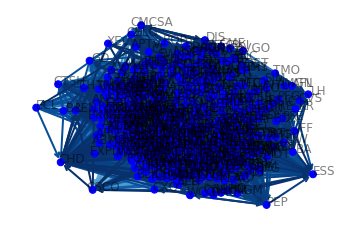

In [0]:
drawGraph(G)

Anomaly graph for 1/20/2016 - shows pairs that are typically cointegrated which for a given day move relative to each other in a way that is statistically unusual

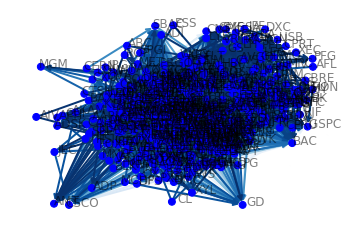

In [0]:
drawGraph(anomG)

Subtract anomaly graph from co-integration graph

In [0]:
DIF=nx.create_empty_copy(G)

In [0]:
DIF.nodes()

NodeView(('ARE', 'MMM', 'ALL', 'BLK', 'BXP', 'CVX', 'DFS', 'XOM', 'FL', 'GPC', 'ITW', 'LLL', 'NWSA', 'NWS', 'PXD', 'ROL', 'SLG', 'TEL', 'AON', 'ABT', 'BBT', 'KEY', 'MMC', 'MET', 'MS', 'PRU', 'SYY', 'TIF', 'USB', 'WFC', 'EMN', 'ABBV', 'GILD', 'LEG', 'RF', 'SIVB', 'ABMD', 'CTL', 'GLW', 'DISH', 'EMR', 'FAST', 'FDX', 'FOXA', 'FOX', 'GRMN', 'HPQ', 'MRK', 'NEM', 'NLSN', 'ORCL', 'PG', 'RL', 'SYMC', 'TROW', 'TJX', 'UTX', 'VIAB', 'WY', 'AXP', 'ACN', 'ARNC', 'CDNS', 'CPRI', 'CNP', 'CTAS', 'CTXS', 'CMI', 'EFX', 'EQIX', 'EXC', 'EXPE', 'FB', 'FISV', 'GPS', 'IT', 'GPN', 'GWW', 'HOG', 'HSY', 'HST', 'IRM', 'JCI', 'KSU', 'KEYS', 'MA', 'MKC', 'NOV', 'ORLY', 'PH', 'PBCT', 'PHM', 'RHI', 'STX', 'SBUX', 'TSS', 'UNP', 'WMT', 'WDC', 'WHR', 'XRX', 'ATVI', 'APC', 'CF', 'STZ', 'EXR', 'KMI', 'MAS', 'MOS', 'JWN', 'NRG', 'PCAR', 'QCOM', 'GOOG', 'ADBE', 'AMZN', 'BHGE', 'XRAY', 'HD', 'MCD', 'NDAQ', 'NOC', 'TSN', 'VFC', 'V', 'SYK', 'AMD', 'A', 'AAP', 'CAH', 'L', 'SHW', 'AMG', 'AES', 'AMCR', 'ATO', 'KMX', 'CLX', 'COO',

In [0]:

ed_tmp= set(G.edges()).difference(set(anomG.edges()))
for e in ed_tmp: 
  DIF.add_edge(e[0],e[1])
DIF.remove_nodes_from(list(nx.isolates(DIF)))

In [0]:
(len(G.edges),len(anomG.edges()))

(20292, 7073)

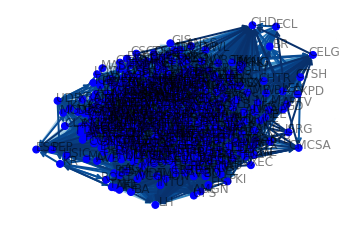

In [0]:
#Visualize the anomaly graph on 1/20/2016
G_minusBrokenLeash = DIF
drawGraph(G_minusBrokenLeash)

In [0]:
#Calculate communities of ticker symbols, based on co-integration graph
comm=nx.algorithms.community.greedy_modularity_communities(G.to_undirected())
for c in list(comm):
  print((len(c),c))

(211, frozenset({'ANET', 'GLW', 'NTRS', 'GD', 'ARE', 'MMM', 'SLG', 'CI', 'EA', 'DUK', 'LYB', 'CTSH', 'HBAN', 'NWSA', 'OXY', 'SPG', 'EW', 'GM', 'FANG', 'SBUX', 'SO', 'DTE', 'ETR', 'FRC', 'CDNS', 'MSCI', 'ANSS', 'FL', 'BMY', 'ARNC', 'SRE', 'UAA', 'BSX', 'HPQ', 'XOM', 'ORLY', 'VRTX', 'PLD', 'ULTA', 'RE', 'HOLX', 'BLK', 'SNPS', 'STI', 'PHM', 'CMCSA', 'LLY', 'EQIX', 'UNP', 'EOG', 'LLL', 'AOS', 'UHS', 'FITB', 'APTV', 'F', 'IDXX', 'PBCT', 'HAS', 'D', 'ALL', 'AAL', 'BAC', 'OMC', 'BBY', 'KSU', 'SCHW', 'MU', 'BA', 'EFX', 'LNT', 'ADS', 'CFG', 'CCL', 'ALLE', 'XRX', 'GPN', 'TFX', 'FB', 'AMAT', 'ABMD', 'GIS', 'MDLZ', 'HCP', 'VTR', 'UNH', 'NTAP', 'MKC', 'O', 'PKI', 'IT', 'HON', 'TSS', 'AMZN', 'MTB', 'AME', 'TEL', 'ES', 'MHK', 'NWS', 'NCLH', 'MNST', 'NSC', 'JPM', 'MAC', 'NEE', 'AFL', 'WYNN', 'PKG', 'WY', 'VLO', 'AVGO', 'MA', 'AVY', 'RF', 'HFC', 'SNA', 'ADP', 'KIM', 'GPC', 'WHR', 'LEN', 'MPC', 'EBAY', 'RMD', 'JCI', 'CME', 'JNPR', 'SWK', 'GRMN', 'WEC', 'PSX', 'TPR', 'CRM', 'CTL', 'ROL', 'PG', 'MLM', 'ST

In [0]:
symbs1 = list(comm)[2]
len(symbs1)

64

Limit co-integration and co-integration minus anomalies to community sub-graphs

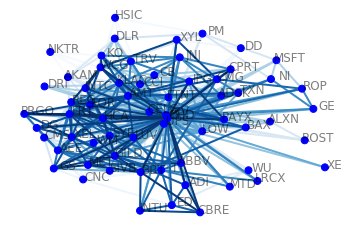

In [0]:
#Co-integration, community sub-graph
Gsub = nx.Graph(G.subgraph(symbs1))
Gsub.remove_nodes_from(list(nx.isolates(Gsub)))
drawGraph(Gsub)

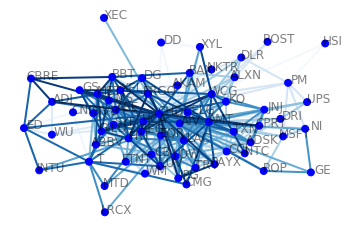

In [0]:
#Co-integration minus anomalies, community sub-graph
G_minusBrokenLeash_sub = nx.Graph(G_minusBrokenLeash.subgraph(symbs1))
G_minusBrokenLeash_sub.remove_nodes_from(list(nx.isolates(G_minusBrokenLeash_sub)))
drawGraph(G_minusBrokenLeash_sub)

In [0]:
(len(Gsub.nodes), len(G_minusBrokenLeash_sub.nodes))

(64, 64)

In [0]:
(len(Gsub.edges), len(G_minusBrokenLeash_sub.edges))

(420, 310)

Calculate anomalies on another date 1/11/2016

In [0]:
anom_date2 = '2016-01-11'
anomG2 = createAnomGraph(anom_df,anom_date2,G,cnst_std_thresh)

An exception occurred ARE ROL
An exception occurred MMM MDT
An exception occurred MMM ROL
An exception occurred BLK MDT
An exception occurred BXP ROL
An exception occurred DFS MDT
An exception occurred FL LNT
An exception occurred FL ROL
An exception occurred GPC ROL
An exception occurred ITW MDT
An exception occurred LLL MDT
An exception occurred ROL MMM
An exception occurred ROL ARE
An exception occurred ROL AAL
An exception occurred ROL AME
An exception occurred ROL ANSS
An exception occurred ROL AIV
An exception occurred ROL ADP
An exception occurred ROL BXP
An exception occurred ROL CELG
An exception occurred ROL CHD
An exception occurred ROL CAG
An exception occurred ROL XOM
An exception occurred ROL FAST
An exception occurred ROL FL
An exception occurred ROL F
An exception occurred ROL GD
An exception occurred ROL GIS
An exception occurred ROL GPC
An exception occurred ROL HOLX
An exception occurred ROL HON
An exception occurred ROL INCY
An exception occurred ROL IQV
An exceptio

In [0]:
#Subtract anomaly graph from 2015 co-integration graph
DIF2=nx.create_empty_copy(G)
ed_tmp= set(G.edges()).difference(set(anomG2.edges()))
for e in ed_tmp: 
  DIF2.add_edge(e[0],e[1])
DIF2.remove_nodes_from(list(nx.isolates(DIF2)))

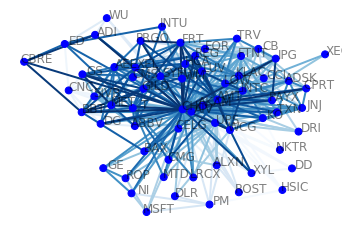

In [0]:
#Filter adjusted co-integration graph to community sub-graph
DIF2 = nx.Graph(DIF2.subgraph(symbs1))
DIF2.remove_nodes_from(list(nx.isolates(DIF2)))
drawGraph(DIF2)

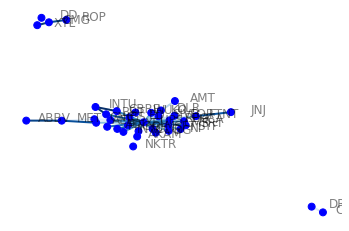

In [0]:
#Visualize the 1/11/2016 anomaly community sub-graph 
anomG2sub = nx.Graph(anomG2.subgraph(symbs1))
anomG2sub.remove_nodes_from(list(nx.isolates(anomG2sub)))
drawGraph(anomG2sub)

In [0]:
(len(Gsub.edges), len(DIF2.edges), len(anomG2sub.edges))

(420, 384, 41)

In [0]:
anomG2sub.edges(data=True)

EdgeDataView([('NKTR', 'AKAM', {'weight': 3.3041787246369343}), ('DD', 'CMG', {'weight': 6.8303599484265805}), ('CNC', 'BBT', {'weight': 3.074328567288961}), ('CNC', 'GS', {'weight': 3.6530842485148107}), ('CNC', 'MET', {'weight': 4.308522338863538}), ('CNC', 'UPS', {'weight': 3.314581936831034}), ('CELG', 'DRI', {'weight': 3.005684986189492}), ('WU', 'UPS', {'weight': 3.020425458319884}), ('AKAM', 'UPS', {'weight': 3.600116839344075}), ('CMS', 'UPS', {'weight': 3.486257327716456}), ('EQR', 'UPS', {'weight': 3.330090737022305}), ('MSFT', 'UPS', {'weight': 3.297322277926369}), ('DLR', 'AMT', {'weight': 3.0350061729812823}), ('DLR', 'KO', {'weight': 3.1661765749303767}), ('DLR', 'UPS', {'weight': 4.2722656560093855}), ('UPS', 'SIVB', {'weight': 3.4894401186996515}), ('UPS', 'FTNT', {'weight': 3.2220773373351923}), ('UPS', 'AEE', {'weight': 4.034495703799358}), ('UPS', 'NI', {'weight': 3.251792796527526}), ('UPS', 'SYF', {'weight': 3.163676277875162}), ('UPS', 'ED', {'weight': 3.740932354

In [0]:
anomG2.edges(data=True)

OutEdgeDataView([('ARE', 'AME', {'weight': 3.5863307215542592}), ('ARE', 'COTY', {'weight': 3.063403205064474}), ('ARE', 'LEN', {'weight': 3.4435835353728788}), ('ARE', 'NEE', {'weight': 3.4071837851190065}), ('ARE', 'SYK', {'weight': 3.5104474278655458}), ('ARE', 'UAA', {'weight': 3.29656589120663}), ('AME', 'AXP', {'weight': 4.907940691705022}), ('AME', 'AIG', {'weight': 3.8607291074975}), ('AME', 'ARNC', {'weight': 4.412120935890566}), ('AME', 'CPRI', {'weight': 4.009449208350581}), ('AME', 'CNP', {'weight': 3.7389699362133006}), ('AME', 'DUK', {'weight': 3.259124442755464}), ('AME', 'EA', {'weight': 3.1114967670070035}), ('AME', 'ETR', {'weight': 3.272633426160733}), ('AME', 'FE', {'weight': 3.270671408286439}), ('AME', 'FRC', {'weight': 4.306756566089118}), ('AME', 'GPC', {'weight': 3.693384820096751}), ('AME', 'HAS', {'weight': 3.1251682378584653}), ('AME', 'HCP', {'weight': 3.9260828291476697}), ('AME', 'HSY', {'weight': 4.96714490131417}), ('AME', 'HPQ', {'weight': 4.2588123382

Prepare the co-integration graph data as node/edges dataframes

In [0]:
#edges_df = nx.to_pandas_edgelist(G)
edges_df = nx.to_pandas_edgelist(G)[["source","target","reg_incpt","resid_mean","resid_std" ]]
edges_df.columns = ["src","dst","intercept","mean","stdev"]
edges_df.head()


,src,dst,intercept,mean,stdev
0,ARE,MMM,0.878109,-1.515070e-13,5.439651
1,ARE,ABMD,317.167906,-3.102609e-13,13.756364
2,ARE,ALL,-27.906387,2.391500e-13,2.625664
3,ARE,AAL,-40.237050,-3.522707e-13,3.061015
4,ARE,AME,69.321225,-3.252644e-13,1.831034


In [0]:
nodes_df = pd.DataFrame([i[0] for i in G.nodes(data=True)])
nodes_df.columns = ["id"]
nodes_df.head()

,id
0,ARE
1,MMM
2,ALL
3,BLK
4,BXP


Display the pairs that 'broke the leash' on anom_date.  The number of standard deviations weights the degree to which the leash is broken (defined as when the number of std deviations is greater than a threshold, cnst_std_thresh)

In [0]:
(anom_date,cnst_std_thresh)

('2016-01-20', 3)

In [0]:
anomG.edges(data=True)

anom_edges_df = nx.to_pandas_edgelist(anomG)[["source","target","weight" ]]
anom_edges_df.columns = ["src","dst","num_stdev"]
anom_edges_df.head()

,src,dst,num_stdev
0,ARE,ALL,3.128701
1,ARE,AME,5.239252
2,ARE,ANSS,3.254830
3,ARE,AMAT,3.705782
4,ARE,CDNS,3.963817
